In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
unique = {feature:train[feature].nunique() for feature in train.columns}

In [10]:
unique

{'PassengerId': 891,
 'Survived': 2,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 88,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Cabin': 147,
 'Embarked': 3}

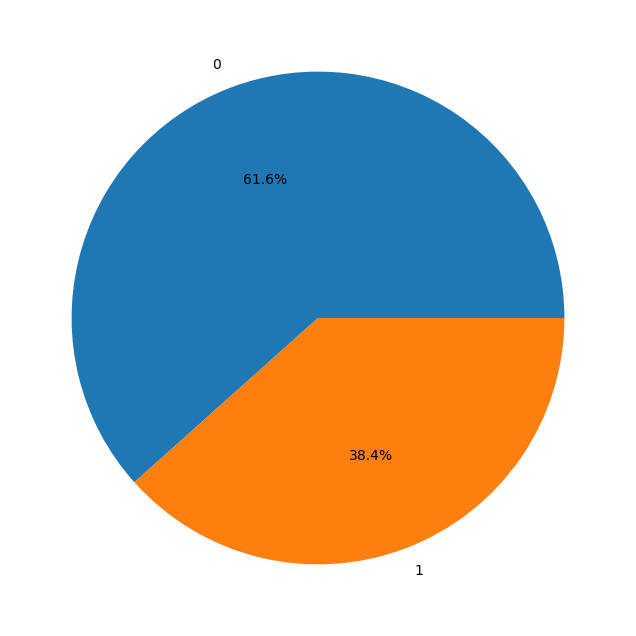

In [11]:
data = train.Survived.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.show()

From the pie chart, 61.6% making for 549 people didn't survive while 38.4% making for 342 people survived 

In [12]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
train['SibSp_map']=train['SibSp'].map({0:0, 1:0, 2:1, 3:1, 4:1, 5:1, 8:1})
train.drop(['SibSp'], axis=1, inplace=True)

In [14]:
test['SibSp_map']=test['SibSp'].map({0:0, 1:0, 2:1, 3:1, 4:1, 5:1, 8:1})
test.drop(['SibSp'], axis=1, inplace=True)

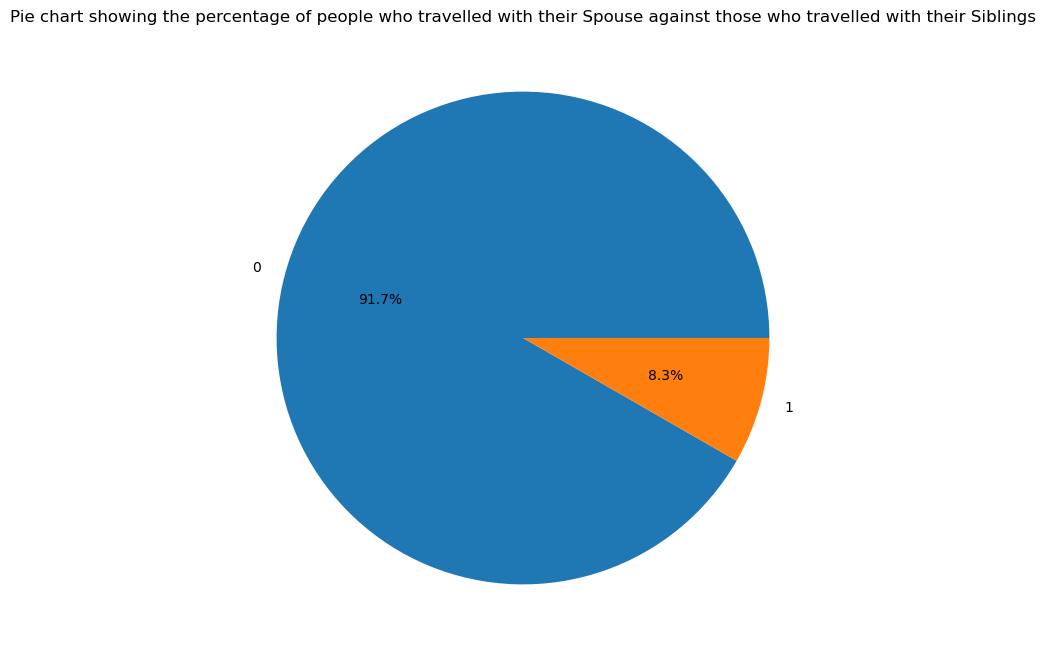

In [15]:
data_1 = train.SibSp_map.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_1, labels=data_1.index, autopct='%1.1f%%')
plt.title("Pie chart showing the percentage of people who travelled with their Spouse against those who travelled with their Siblings")
plt.show()

In [16]:
train.SibSp_map.value_counts()

0    817
1     74
Name: SibSp_map, dtype: int64

From the pie chart, 94% making for 847 people travelled with their Spouse while 6% making for 74 people travelled with their siblings

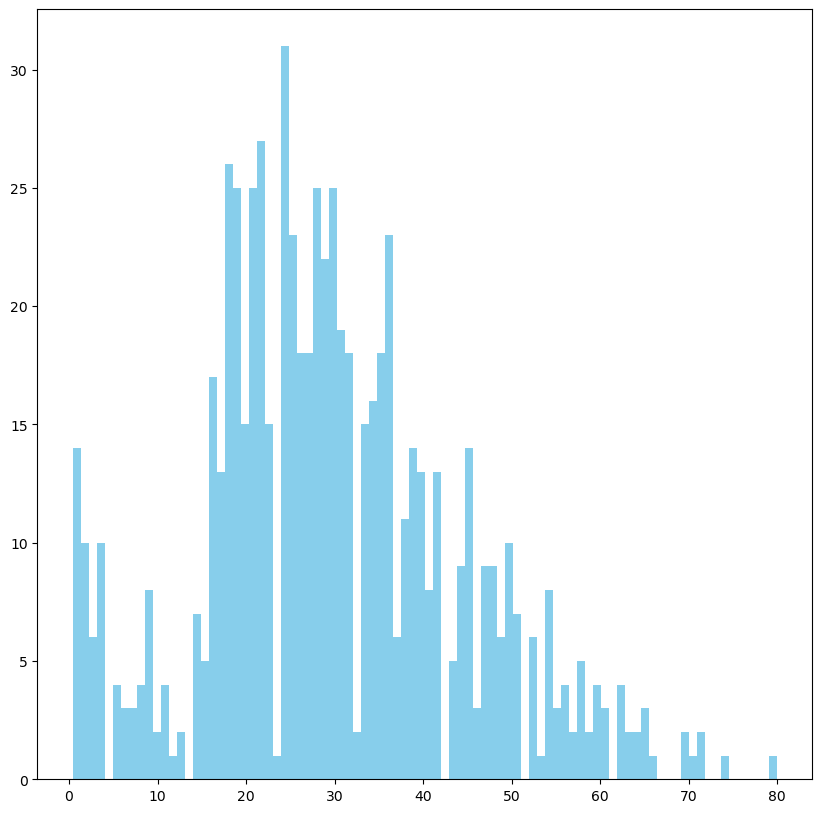

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(train['Age'], bins=train.Age.nunique(), color="skyblue")
plt.show()

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'SibSp_map'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

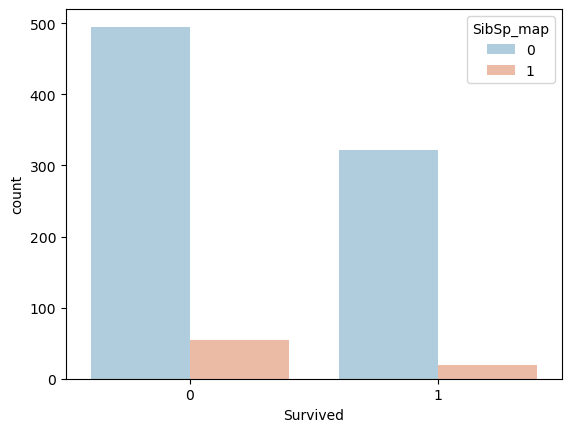

In [19]:
sns.set_style()
sns.countplot(x='Survived', hue='SibSp_map', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

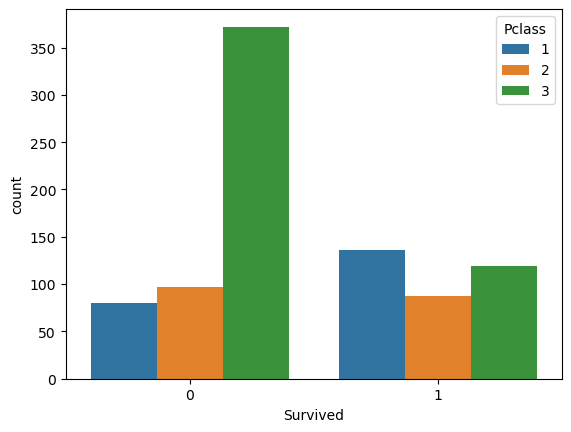

In [20]:
sns.set_style()
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

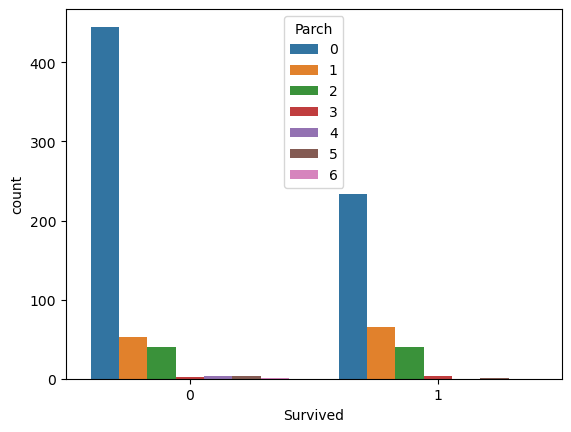

In [21]:
sns.set_style()
sns.countplot(x='Survived', hue='Parch', data=train)

# Data Preprocessing

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,SibSp_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S,0


In [23]:
train.drop(['PassengerId', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [24]:
test.drop(['PassengerId', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [25]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,SibSp_map
0,0,3,male,22.0,0,7.2500,0
1,1,1,female,38.0,0,71.2833,0
2,1,3,female,26.0,0,7.9250,0
3,1,1,female,35.0,0,53.1000,0
4,0,3,male,35.0,0,8.0500,0


In [26]:
train['Sex_map']=train['Sex'].map({'male':1, 'female':0})
train.drop('Sex', axis=1, inplace=True)

In [27]:
test['Sex_map']=test['Sex'].map({'male':1, 'female':0})
test.drop('Sex', axis=1, inplace=True)

In [28]:
train.head()

,Survived,Pclass,Age,Parch,Fare,SibSp_map,Sex_map
0,0,3,22.0,0,7.2500,0,1
1,1,1,38.0,0,71.2833,0,0
2,1,3,26.0,0,7.9250,0,0
3,1,1,35.0,0,53.1000,0,0
4,0,3,35.0,0,8.0500,0,1


In [29]:
test.head()

,Pclass,Age,Parch,Fare,SibSp_map,Sex_map
0,3,34.5,0,7.8292,0,1
1,3,47.0,0,7.0000,0,0
2,2,62.0,0,9.6875,0,1
3,3,27.0,0,8.6625,0,1
4,3,22.0,1,12.2875,0,0


In [30]:
print(train['Age'].max())
print(train['Age'].min())

80.0
0.42


In [31]:
def apply_map(value):
    if value >= 20 and value <= 40:
        return 1
    else:
        return 0

In [32]:
train['mapped_age'] = train['Age'].apply(apply_map)

In [33]:
test['mapped_age'] = test['Age'].apply(apply_map)

<AxesSubplot:xlabel='Survived', ylabel='count'>

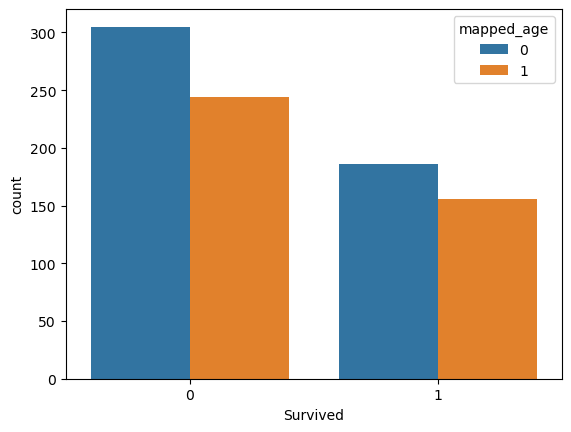

In [34]:
sns.set_style()
sns.countplot(x='Survived', hue='mapped_age', data=train)

In [35]:
#train['Ticket'] = pd.to_numeric(train['Ticket'], errors='coerce')

In [36]:
y = train['Survived']
train.drop('Survived', axis=1, inplace=True)

In [37]:
train.isnull().sum()

Pclass          0
Age           177
Parch           0
Fare            0
SibSp_map       0
Sex_map         0
mapped_age      0
dtype: int64

In [38]:
test.isnull().sum()

Pclass         0
Age           86
Parch          0
Fare           1
SibSp_map      0
Sex_map        0
mapped_age     0
dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.40, random_state=200)

In [40]:
x_train.isnull().sum()

Pclass          0
Age           104
Parch           0
Fare            0
SibSp_map       0
Sex_map         0
mapped_age      0
dtype: int64

In [41]:
y_train.isnull().sum()

0

In [42]:
x_train['Age'].median()
x_test['Age'].median()
#x_test['Ticket'].mode()

29.0

In [43]:
x_train.fillna(x_train['Age'].median(), inplace=True)
x_test.fillna(x_test['Age'].median(), inplace=True)
test.fillna(test['Age'].median(), inplace=True)
#x_test.fillna(x_test['Ticket'].mode(), inplace=True)

## Model Building

In [44]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [45]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
#LinearDiscriminantAnalysis())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
#KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.790217 (0.030353)
ScaledCART: 0.786653 (0.047683)
ScaledNB: 0.771523 (0.029887)
ScaledSVM: 0.810867 (0.031571)


In [46]:
# prepare the model
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = SVC(C=1.5)
model.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8123249299719888
[[200  21]
 [ 46  90]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       221
           1       0.81      0.66      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



In [47]:
prediction_1=model.predict(test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [48]:
test = pd.read_csv('test.csv')
new_dataset = pd.DataFrame(prediction_1, columns=["Survived"])
new_dataset.set_index(test['PassengerId'], inplace=True)
new_dataset.to_csv("Submission.csv")